In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

### Low Duration Outage

In [5]:
with open('Low_Outage.pkl', 'rb') as handle:
    l_ESPV, l_ESL, l_PVL, l_PVES, l_DGES, l_DGL, l_LT, l_LL = pickle.load(handle)
handle.close()

In [62]:
jan = [12*i for i in range(168)]


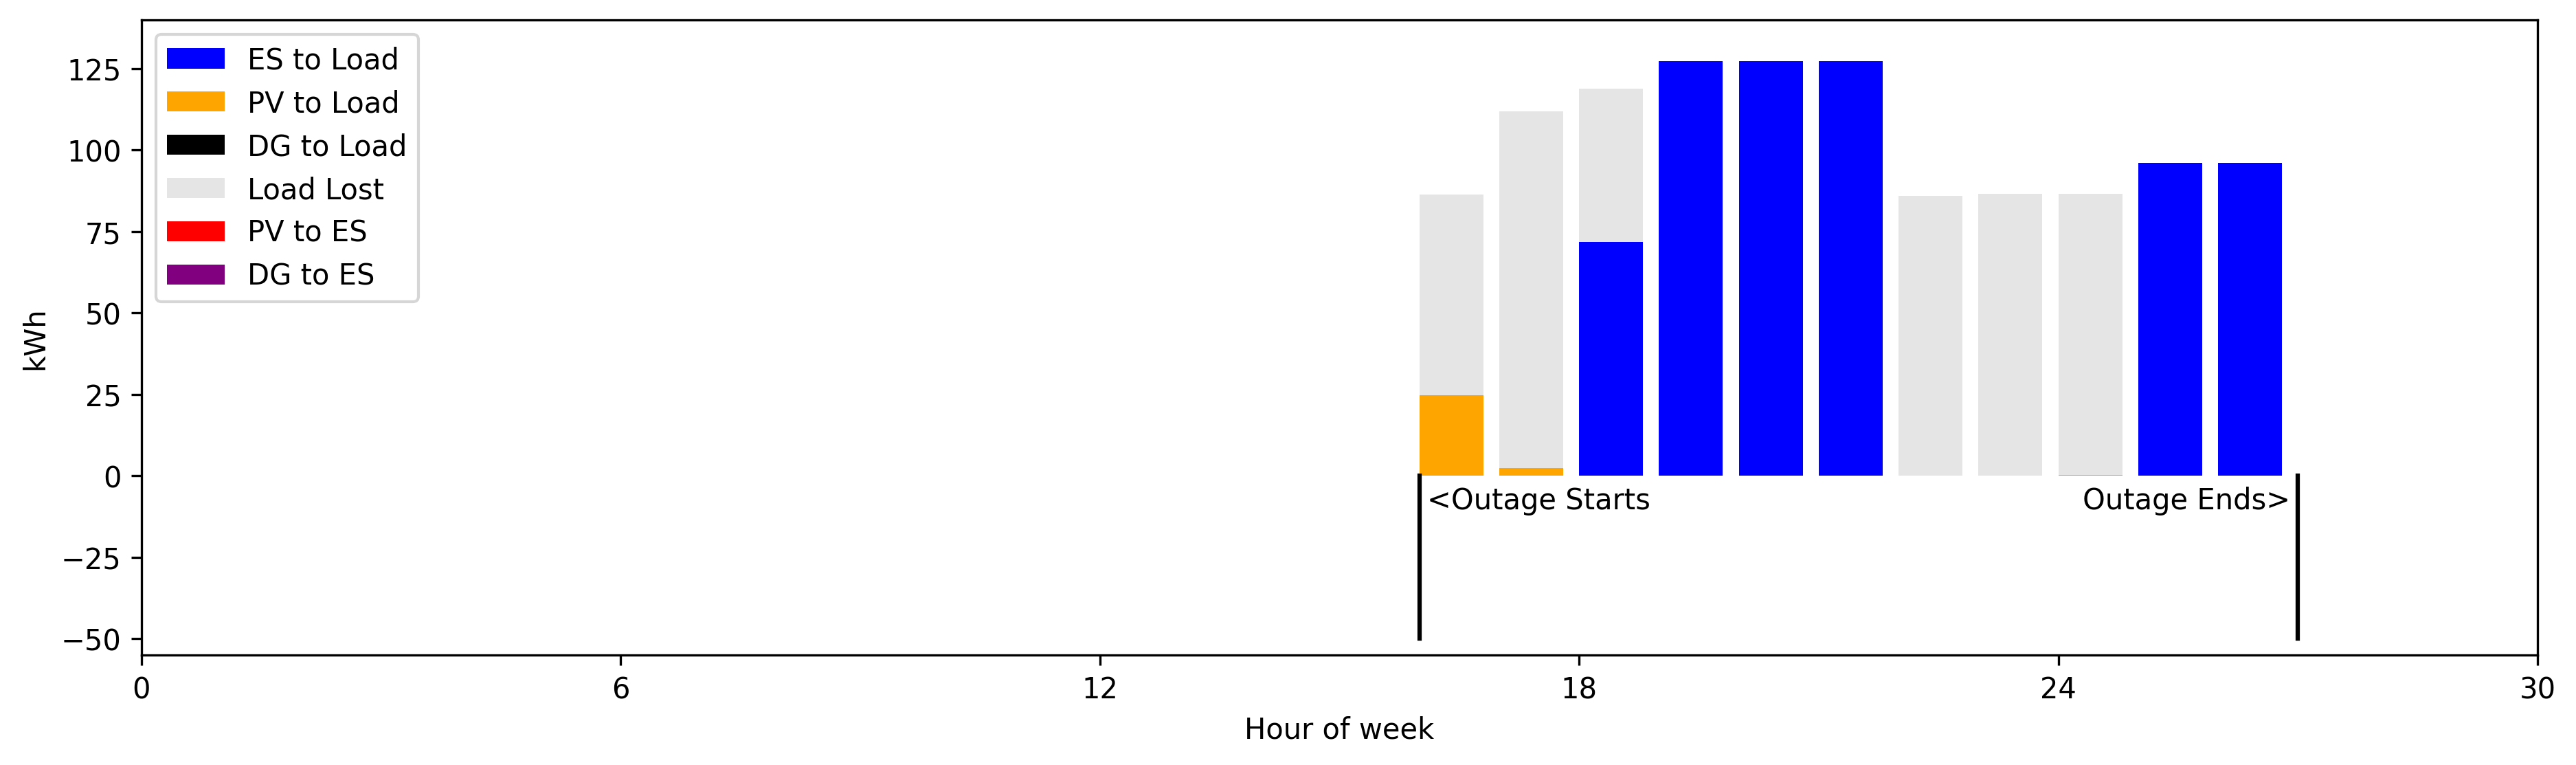

In [138]:
with open('Low_Outage.pkl', 'rb') as handle:
    PVES, ESL, PVL, PVES, DGES, DGL, LT, LL = pickle.load(handle)
handle.close()
PVES_jan = np.array([PVES[j] for j in jan])
PVL_jan = np.array([PVL[j] for j in jan])
ESL_jan = np.array([ESL[j] for j in jan])
LL_jan = np.array([LL[j] for j in jan])
DGL_jan = np.array([DGL[j] for j in jan])
DGES_jan = np.array([DGES[j] for j in jan])

figure2 = plt.figure(figsize=(15, 4), dpi=300)
rng = range(16, 16+10+1)
s,e = 16, 16+10+1
plt.bar(rng, ESL_jan[s:e], color='blue', align='edge', label='ES to Load')
plt.bar(rng, PVL_jan[s:e], bottom=ESL_jan[s:e], color='orange', align='edge', label='PV to Load')
plt.bar(rng, DGL_jan[s:e], bottom=ESL_jan[s:e]+PVL_jan[s:e], color='black', align='edge', label='DG to Load')
plt.bar(rng, LL_jan[s:e], bottom=ESL_jan[s:e]+PVL_jan[s:e]+DGL_jan[s:e], color='gray', alpha=0.2, align='edge', label='Load Lost')
plt.bar(rng, -1*PVES_jan[s:e], color='red', label='PV to ES')
plt.bar(rng, -1*DGES_jan[s:e], color='purple', label='DG to ES')
plt.plot([16, 16], [-50, 0], color='black')
plt.plot([16+10+1, 16+10+1], [-50, 0], color='black')
plt.text(x=16.1, y=-10, s='<Outage Starts')
plt.text(x=14.3+10, y=-10, s='Outage Ends>')
plt.xlabel('Hour of week')
plt.xticks([6*i for i in range(6)])
plt.ylabel('kWh')
plt.ylim([-1.1*50, 1.1*max(ESL_jan[s:e])])
plt.legend()
plt.savefig('../IMG/SS-LowOutage.jpg', bbox_inches='tight')

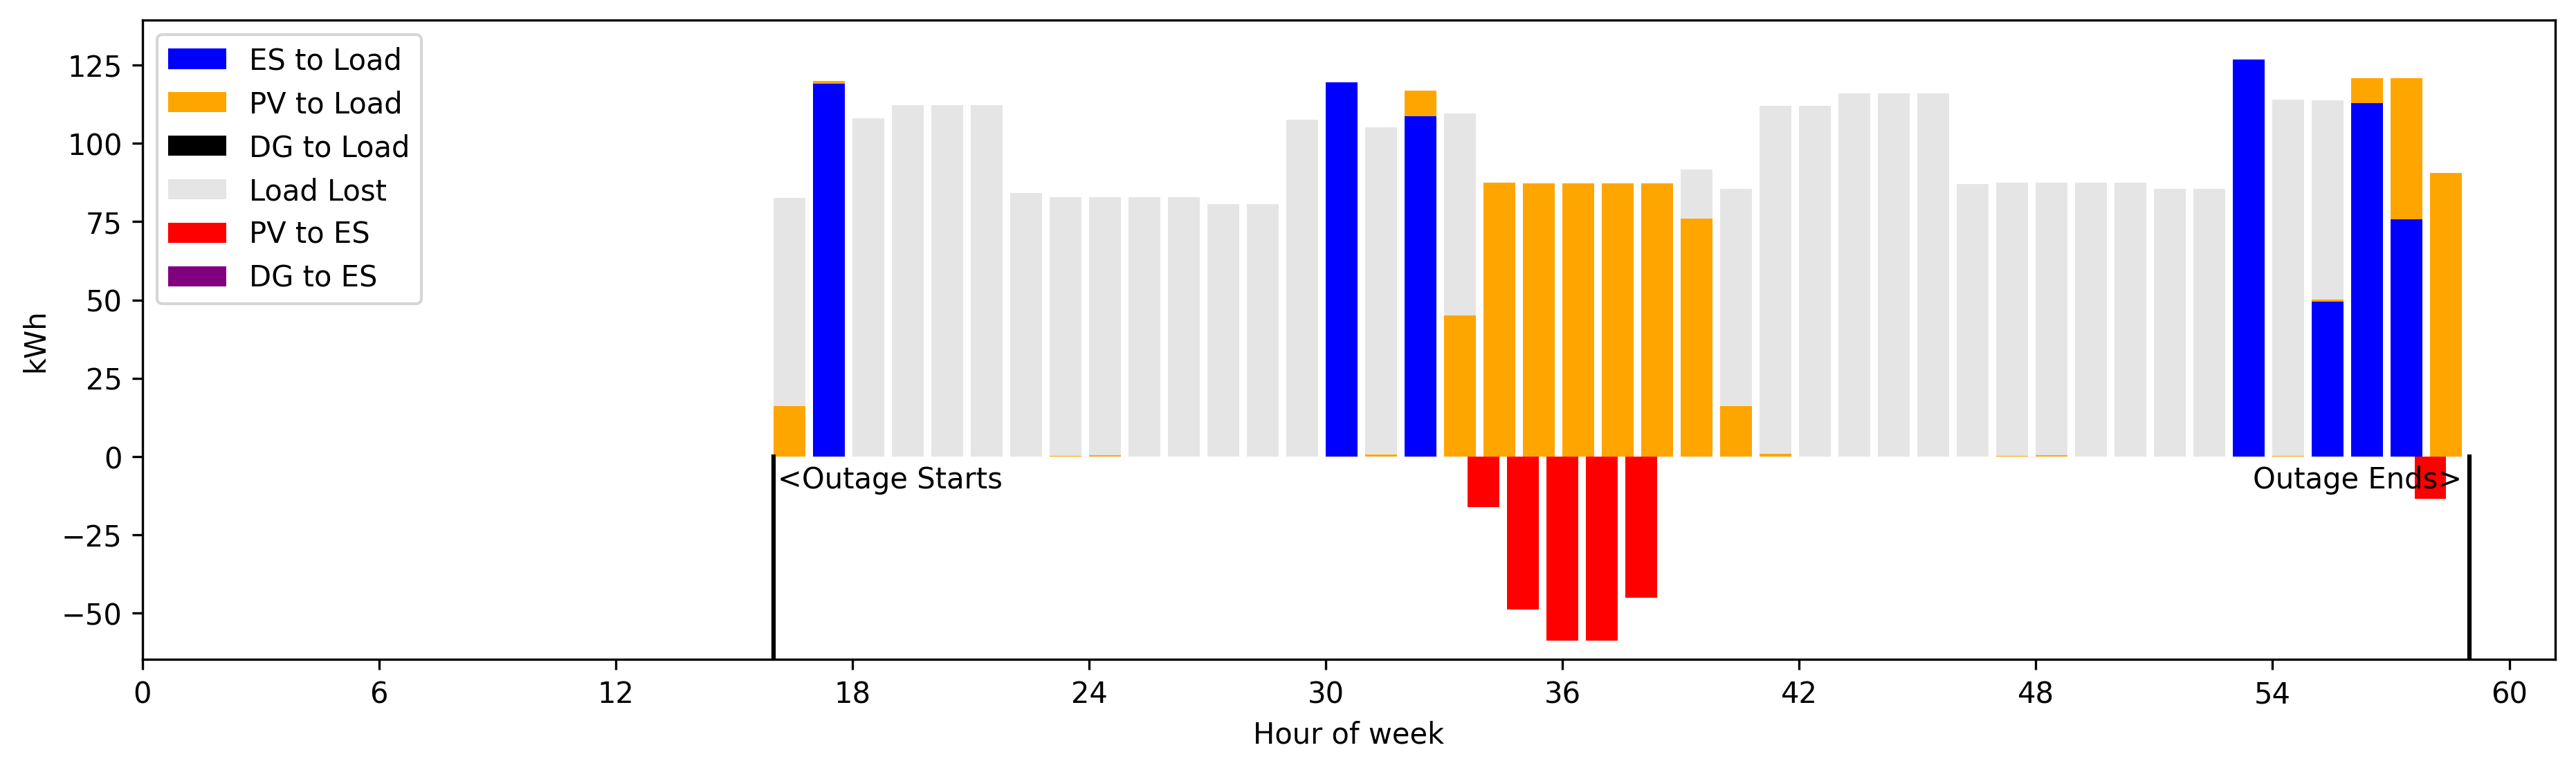

In [129]:
with open('Medium_Outage.pkl', 'rb') as handle:
    PVES, ESL, PVL, PVES, DGES, DGL, LT, LL = pickle.load(handle)
handle.close()
PVES_jan = np.array([PVES[j] for j in jan])
PVL_jan = np.array([PVL[j] for j in jan])
ESL_jan = np.array([ESL[j] for j in jan])
LL_jan = np.array([LL[j] for j in jan])
DGL_jan = np.array([DGL[j] for j in jan])
DGES_jan = np.array([DGES[j] for j in jan])

figure2 = plt.figure(figsize=(15, 4), dpi=300)
rng = range(16, 16+42+1)
s,e = 16, 16+42+1
plt.bar(rng, ESL_jan[s:e], color='blue', align='edge', label='ES to Load')
plt.bar(rng, PVL_jan[s:e], bottom=ESL_jan[s:e], color='orange', align='edge', label='PV to Load')
plt.bar(rng, DGL_jan[s:e], bottom=ESL_jan[s:e]+PVL_jan[s:e], color='black', align='edge', label='DG to Load')
plt.bar(rng, LL_jan[s:e], bottom=ESL_jan[s:e]+PVL_jan[s:e]+DGL_jan[s:e], color='gray', alpha=0.2, align='edge', label='Load Lost')
plt.bar(rng, -1*PVES_jan[s:e], color='red', label='PV to ES')
plt.bar(rng, -1*DGES_jan[s:e], color='purple', label='DG to ES')
plt.plot([16, 16], [-1.1*max(PVES_jan[s:e]), 0], color='black')
plt.plot([16+42+1, 16+42+1], [-1.1*max(PVES_jan[s:e]), 0], color='black')
plt.text(x=16.1, y=-10, s='<Outage Starts')
plt.text(x=11.5+42, y=-10, s='Outage Ends>')
plt.xlabel('Hour of week')
plt.xticks([6*i for i in range(11)])
plt.ylabel('kWh')
plt.ylim([-1.1*max(PVES_jan[s:e]), 1.1*max(ESL_jan[s:e])])
plt.legend()
plt.savefig('../IMG/SS-MediumOutage.jpg', bbox_inches='tight')

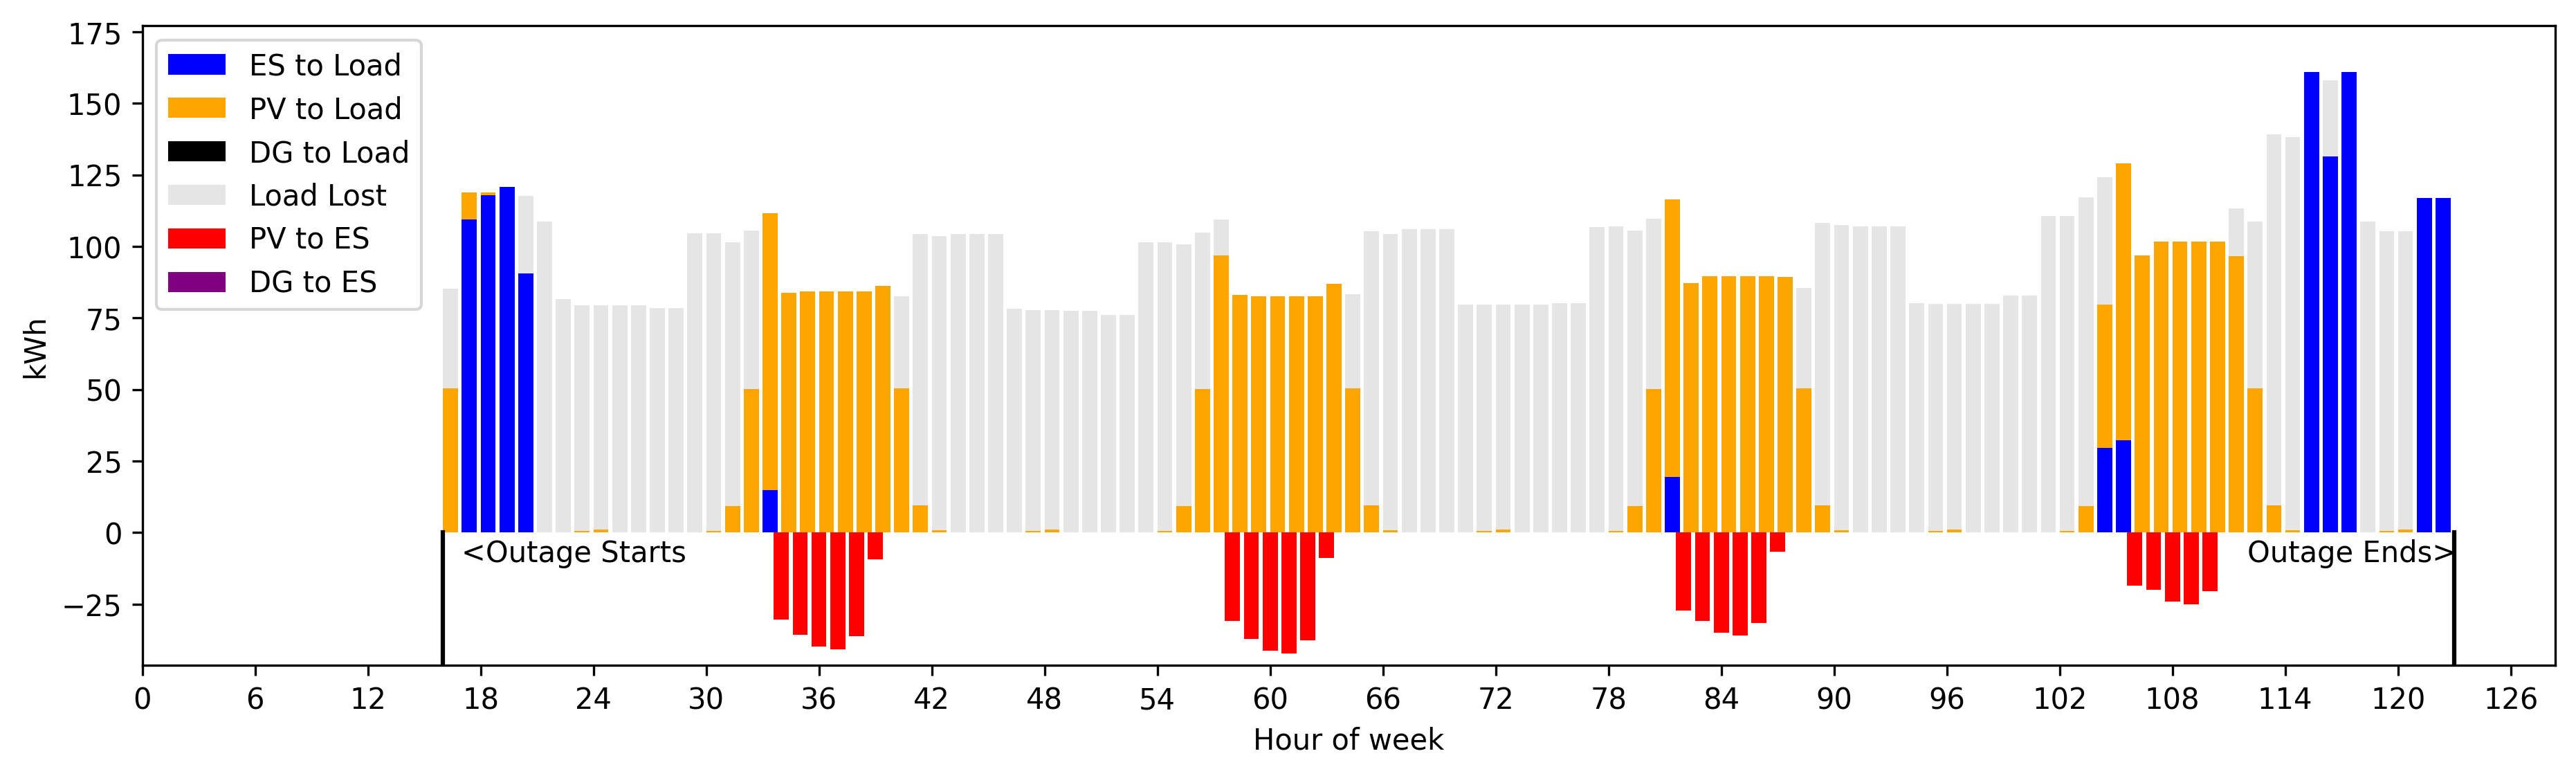

In [121]:
with open('High_Outage.pkl', 'rb') as handle:
    PVES, ESL, PVL, PVES, DGES, DGL, LT, LL = pickle.load(handle)
handle.close()
PVES_jan = np.array([PVES[j] for j in jan])
PVL_jan = np.array([PVL[j] for j in jan])
ESL_jan = np.array([ESL[j] for j in jan])
LL_jan = np.array([LL[j] for j in jan])
DGL_jan = np.array([DGL[j] for j in jan])
DGES_jan = np.array([DGES[j] for j in jan])

figure2 = plt.figure(figsize=(15, 4), dpi=300)
rng = range(16, 16+106+1)
s,e = 16, 16+106+1
plt.bar(rng, ESL_jan[s:e], color='blue', align='edge', label='ES to Load')
plt.bar(rng, PVL_jan[s:e], bottom=ESL_jan[s:e], color='orange', align='edge', label='PV to Load')
plt.bar(rng, DGL_jan[s:e], bottom=ESL_jan[s:e]+PVL_jan[s:e], color='black', align='edge', label='DG to Load')
plt.bar(rng, LL_jan[s:e], bottom=ESL_jan[s:e]+PVL_jan[s:e]+DGL_jan[s:e], color='gray', alpha=0.2, align='edge', label='Load Lost')
plt.bar(rng, -1*PVES_jan[s:e], color='red', label='PV to ES')
plt.bar(rng, -1*DGES_jan[s:e], color='purple', label='DG to ES')
plt.plot([16, 16], [-1.1*max(PVES_jan[s:e]), 0], color='black')
plt.plot([16+106+1, 16+106+1], [-1.1*max(PVES_jan[s:e]), 0], color='black')
plt.text(x=17, y=-10, s='<Outage Starts')
plt.text(x=6+106, y=-10, s='Outage Ends>')
plt.xlabel('Hour of week')
plt.xticks([6*i for i in range(22)])
plt.ylabel('kWh')
plt.ylim([-1.1*max(PVES_jan[s:e]), 1.1*max(ESL_jan[s:e])])
plt.legend()
plt.savefig('../IMG/SS-HighOutage.jpg', bbox_inches='tight')

In [56]:
 [(i,t,g) for i in (1,2) for t in (5,6) for g in (7,8)]


[(1, 5, 7),
 (1, 5, 8),
 (1, 6, 7),
 (1, 6, 8),
 (2, 5, 7),
 (2, 5, 8),
 (2, 6, 7),
 (2, 6, 8)]